# Load Packages

In [144]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


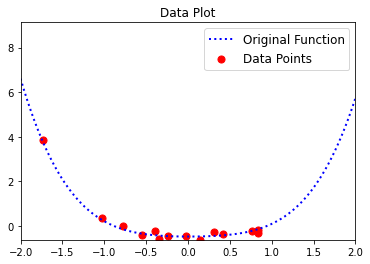

In [145]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [146]:
degree = 4
#degree set as 4
MAT_A = np.zeros((n_data,1 + degree))
#Using Vandermonde matrix, initiaalizing it as zero matrix
for a in range(n_data):
    #filling in the element in matrix
    for b in range (1 + degree): 
        #usage of power operator with for loop
        MAT_A[a,b] = x_data[a] ** b
        #np.concatenate((MAT_A[a,b],x_data[a]),axis = 1)??
        #not sure about the usage of np.concatenation

### Print results (do not modify the following block)

In [147]:
print(MAT_A)

[[ 1.00000000e+00  7.69458258e-01  5.92066011e-01  4.55570081e-01
   3.50542161e-01]
 [ 1.00000000e+00 -5.48726825e-01  3.01101129e-01 -1.65222266e-01
   9.06618896e-02]
 [ 1.00000000e+00 -3.96088994e-01  1.56886491e-01 -6.21410124e-02
   2.46133711e-02]
 [ 1.00000000e+00 -3.44457358e-01  1.18650871e-01 -4.08701656e-02
   1.40780292e-02]
 [ 1.00000000e+00 -1.73259726e+00  3.00189326e+00 -5.20107204e+00
   9.01136317e+00]
 [ 1.00000000e+00 -1.02635747e+00  1.05340965e+00 -1.08117486e+00
   1.10967189e+00]
 [ 1.00000000e+00  8.31832735e-01  6.91945699e-01  5.75583083e-01
   4.78788850e-01]
 [ 1.00000000e+00  4.18095727e-01  1.74804037e-01  7.30848209e-02
   3.05564513e-02]
 [ 1.00000000e+00 -7.73450895e-01  5.98226287e-01 -4.62698657e-01
   3.57874691e-01]
 [ 1.00000000e+00  1.41388300e-01  1.99906515e-02  2.82644423e-03
   3.99626146e-04]
 [ 1.00000000e+00  3.16614871e-01  1.00244977e-01  3.17390503e-02
   1.00490553e-02]
 [ 1.00000000e+00  8.32089704e-01  6.92373276e-01  5.76116675e-01

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [151]:
#Using Vand mat A from prob 1
_MAT_A = np.zeros((len(x_list),1 + degree))
#repeating the similar step usedin prob 1
for a in range (len(x_data)):
    #for loop to fill in elements in matrix
    for b in range (1 + degree):
        _MAT_A[a,b] = x_list[a] ** b
#pseudo inverse to obtain the value of y_est
MAT_A_inv = np.linalg.pinv(MAT_A) 
#Checking if the elements are added
print(MAT_A_inv)
#estimated values for w and y using np.matmul, and x_list 
w_est,y_est = np.matmul(MAT_A_inv, y_data),np.matmul(_MAT_A, w_est)
#for some reason there is a strange problem here

[[ 0.00951103  0.06100016  0.09679067  0.10877853 -0.03797634 -0.02958471
  -0.03986938  0.16780733  0.01215588  0.18752399  0.18338644 -0.04008842
   0.1720102   0.13132928  0.01722533]
 [ 0.13467832 -0.35157116 -0.2681721  -0.22851147  0.3748379  -0.24444431
  -0.03597863  0.47107635 -0.37031343  0.28527492  0.4312655  -0.03676968
   0.10690758 -0.13697817 -0.13130164]
 [ 0.19037127 -0.02445941 -0.11193204 -0.13834476  0.34918388  0.27031714
   0.28333806 -0.15846383  0.1177447  -0.25212695 -0.2093632   0.28374187
  -0.2471887  -0.1838736  -0.16894444]
 [ 0.0668269   0.351977    0.25892428  0.21195595 -0.68356158  0.1450339
   0.34730145 -0.57875936  0.34758546 -0.40638316 -0.55904145  0.34858807
  -0.19559687  0.10144933  0.24370009]
 [ 0.00269949  0.13061038  0.11358529  0.1010279  -0.34626061 -0.01676957
   0.09871229 -0.19606992  0.09698434 -0.11431078 -0.18030283  0.09915662
  -0.03412531  0.06781111  0.1772516 ]]


### Print results (do not modify the following block)

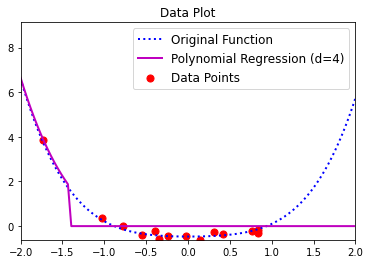

In [152]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()
#I wonderr why the graph is like that :(

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [155]:
degree1 = 1
#setting degree 1 
MAT_A1 = np.zeros((n_data,1 + degree1))
#Again, repeating the steps that were used in problem 1,2
for a in range (n_data):
    #Loop to fill in elemennts within range degree + 1
    for b in range (1 + degree1):
        MAT_A1[a,b] = x_data[a] ** b   
#Assigning value to new Matrix A1
_MAT_A1 = np.zeros((len(x_list), degree1+1))
#again, loop to fill in the elements
for p in range (len(x_list)):
    for q in range (1 + degree1):
        _MAT_A1[p,q] = x_list[p] ** q
MAT_A1_inv = np.linalg.pinv(MAT_A1) 
#Checking if the elements are added
print(MAT_A1_inv)
#estimated values for w_1 and y_1 using np.matmul once again
w_est1,y_est1 = np.matmul(MAT_A1_inv, y_data),np.matmul(_MAT_A1, w_est1)

[[ 0.09084408  0.05999668  0.06356862  0.06477687  0.03229243  0.04881944
   0.09230373  0.0826217   0.05473782  0.07614635  0.0802469   0.09230975
   0.07236146  0.0671411   0.02183306]
 [ 0.09168464 -0.02529366 -0.01174829 -0.00716639 -0.13035263 -0.06767953
   0.09721987  0.06050405 -0.04523611  0.03594849  0.05149844  0.09724268
   0.02159555  0.00179912 -0.17001623]]


### Print results (do not modify the following block)

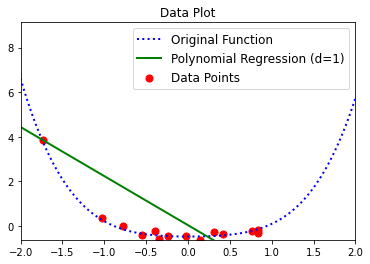

In [156]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [157]:
degree2 = 10
#setting degree 10
MAT_A2 = np.zeros((n_data,1 + degree2))
#Again, repeating the steps from problem 3
for a in range (n_data):
    #Loop to fill in elemennts within range degree + 1
    for b in range (1 + degree2):
        MAT_A2[a,b] = x_data[a] ** b   
#Assigning value to new Matrix A2
_MAT_A2 = np.zeros((len(x_list), degree2+1))
#again, loop to fill in the elements
for p in range (len(x_list)):
    for q in range (1 + degree2):
        _MAT_A2[p,q] = x_list[p] ** q
MAT_A2_inv = np.linalg.pinv(MAT_A2) 
#Checking if the elements are added
print(MAT_A2_inv)
#estimated values for w_2 and y_2 using np.matmul once again
w_est2,y_est2 = np.matmul(MAT_A2_inv, y_data),np.matmul(_MAT_A2, w_est2)

[[-3.80914497e-03  5.95118433e-02 -1.04156219e-01 -6.37295937e-02
  -4.21028682e-06  8.74527144e-04 -9.64339997e-04  6.80229963e-02
  -9.73815303e-03  3.40274055e-01 -1.74347100e-01  2.77902672e-03
   7.09981275e-01  1.75304839e-01  1.98669528e-07]
 [ 1.54566208e-01  1.25860188e+00 -1.26574047e-01 -8.94051602e-01
  -6.53393346e-04  5.90086054e-02 -2.98076136e-02 -1.37350146e+00
  -4.15039453e-01  2.43332937e+00  2.19397112e+00 -4.96305049e-02
  -1.02067396e+00 -2.18959187e+00  4.67239363e-05]
 [ 2.63174611e-01 -6.59904033e+00  6.12527879e+00  6.87373109e+00
   1.16444077e-03 -1.55099336e-01  3.95400589e-02 -5.53077765e+00
   1.41718564e+00 -6.81053871e-01  1.37149851e+01 -1.59842086e-01
  -1.63671797e+01  1.05800547e+00 -7.22897447e-05]
 [-3.07759268e+00 -2.17867691e+01 -1.56528070e+00  7.55381538e+00
   1.43588123e-02 -1.24481126e+00  7.42293073e-01  1.81709581e+01
   8.31058468e+00 -2.20602803e+01 -1.01990763e+01  8.69401301e-01
   3.97574766e+00  2.02976861e+01 -1.03481093e-03]
 [-5

### Print results (do not modify the following block)

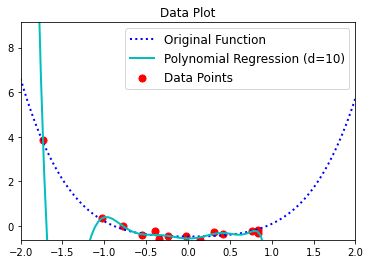

In [158]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

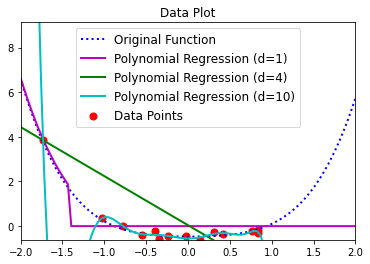

In [160]:
#Answer
# pros and cons of high degree polynomial is overfitting

#Pros:With a higher power/degree, we are able to draw a model 
# with freedom that can hit as many data points as possible.

#Cons: When the model gets too complex, the overfitting can produce
# misleading R-squared values, regression coefficients and p-values which
# will lead to a misleading conclusion when analyzing data.

#pros and cons of low degree polynomial is underfitting

#Pros: Even though there are high bias and low variance,
# underfitted models are usually easier to identify than overfitted models.
# Basically, simplicity.

#Cons:An underfit model will be less flexible and cannot account for the data.
# In addition, it is hard to judge what the data points are demonstrating. This makes
# harder for us to analyze what the data mean from the model.


# Not totally sure but I believe 
# This phenomenon is called data analysis.
# This this phenomenon is used in decision tree classifier and etc
# in order to find and analyze the scenarios and models for better future experiments
# I think Deep learning algorithm uses this..?


plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!